In [115]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [116]:
MP = os.path.join(os.pardir, 'metadata1')

In [117]:
def init_normal(m):
    if type(m) == nn.Linear:
        nn.init.kaiming_uniform_(m.weight)
def get_columname(PATH):
    for i in list(os.listdir(PATH)):
        file = os.path.join(PATH, i)
        instance = np.load(file, allow_pickle=True)
        column = []
        column += ['z_mu_' + str(j) for j in range(len(instance['z_mu']))]
        column += ['z_sig_' + str(j) for j in range(len(instance['z_sig']))]
        column += ['vp' + str(j) for j in range(len(instance['vp']))]
        column.append('y')
        return column

def load_meta(PATH):
    total = []
    for i in list(os.listdir(PATH)):
        instance_list= []
        file = os.path.join(PATH, i)
        instance = np.load(file, allow_pickle=True)
        instance_list.extend(instance['z_mu'])
        instance_list.extend(instance['z_sig'])
        instance_list.extend(instance['vp'])
        instance_list.append(int(instance['y'].item()))
        total.append(instance_list)
    
    total = np.array(total)
    df = pd.DataFrame(data = total, columns=get_columname(PATH))
    df = df.astype({'vp0':int, 'vp1':int, 'vp2':int, 'y':int})
    return df
        

In [118]:
a = load_meta(MP)

In [119]:
a

,z_mu_0,z_mu_1,z_mu_2,z_mu_3,z_mu_4,z_mu_5,z_mu_6,z_mu_7,z_mu_8,z_mu_9,...,z_sig_26,z_sig_27,z_sig_28,z_sig_29,z_sig_30,z_sig_31,vp0,vp1,vp2,y
0,-0.618678,-0.658830,0.996242,-0.996403,-0.028649,-0.998194,0.999213,0.552009,-0.058491,-0.997051,...,0.367879,0.367879,0.367879,0.367879,0.367879,0.367879,0,0,1,0
1,0.862571,-0.941453,0.955782,-0.997597,-0.208997,-0.999700,-0.987176,0.996988,-0.995751,-0.774342,...,0.367879,0.367879,0.367879,0.367879,0.367879,0.367879,0,0,1,10
2,0.785671,-0.859014,0.998854,-0.997018,0.849262,-0.998977,-0.556846,0.984850,-0.441752,-0.999578,...,0.367879,0.367879,0.367879,0.367879,0.367879,0.367879,0,0,1,130
3,-0.931641,0.972322,0.999803,-0.864349,0.559585,-0.776151,0.964803,0.699126,0.312649,-0.999741,...,0.367879,0.367879,0.367879,0.367879,0.367879,0.367879,0,0,1,72
4,-0.080938,-0.685659,-0.165921,0.999313,0.963709,0.991040,-0.979468,-0.927676,-0.993806,0.999467,...,0.367879,0.367879,0.367879,0.367879,0.367879,0.367879,0,0,1,413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5897,-0.901259,-0.990732,0.999960,-0.943246,0.819818,-0.606960,0.997472,-0.511044,-0.992544,-0.933740,...,0.367879,0.367879,0.367879,0.367879,0.367879,0.367879,0,0,1,75
5898,-0.998240,0.892293,0.794499,0.261753,-0.827686,-0.065764,0.993889,0.774129,0.987798,0.968225,...,0.367879,0.367879,0.367879,0.367879,0.367879,0.367879,0,0,1,108
5899,-0.911131,0.863759,0.999699,0.523237,0.146535,-0.946958,0.996871,0.538865,-0.276783,-0.939564,...,0.367879,0.367879,0.367879,0.367879,0.367879,0.367879,0,0,1,354
5900,0.998635,0.993459,0.997001,-0.997850,0.999025,-0.963214,0.484722,0.090078,0.981727,-0.999903,...,0.367879,0.367879,0.367879,0.367879,0.367879,0.367879,1,0,0,83


## XGBOOST

In [6]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [15]:
b = a.y.value_counts()

In [24]:
b.keys()

Int64Index([ 93,  15,  66,  10,  62,  36,  82, 189,  28,  77,
            ...
            671, 677, 678, 682, 207, 683, 685, 209, 687, 400],
           dtype='int64', length=788)

In [25]:
nl = [k for k in list(b.keys()) if b[k]>=6]

In [57]:
ndf = a[a['y'].isin(nl)]
ndf_2 = ndf.replace({'y':{item:i for i, item in enumerate(np.unique(ndf.y.values))}})

In [62]:
#X, y = a.iloc[:,:-1].values, a.iloc[:,-1].values
X, y = ndf_2.iloc[:,:-1].values, ndf_2.iloc[:,-1].values


In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

In [64]:
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='mlogloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, ...)

In [65]:
y_pred = model.predict(X_test)

In [66]:
accuracy_score(y_test, y_pred)

0.0021141649048625794

## NN

In [120]:
a.shape

(5902, 68)

In [121]:
lol = sorted(list(a.y.unique()))
print(len(lol))

788


In [122]:
import pandas as pd
import numpy as np
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import StratifiedKFold
from tqdm import tqdm



class CustomTrain(nn.Module):
    def __init__(self, n_features, n_classes, layers_list, activation=nn.ReLU(), dropout_list=None, batch_norm=True):
        super(CustomTrain, self).__init__()
        self.n_features = n_features
        self.n_classes = n_classes
        self.layers_list = layers_list
        self.activation = activation
        self.dropout_list = dropout_list
        self.batch_norm = batch_norm
        self.net = []
        self.b_list = []
        if self.dropout_list:
            self.dropout_list = [nn.Dropout(i) for i in self.dropout_list]
        for i in range(len(self.layers_list)):
            if self.batch_norm:
                self.b_list.append(nn.BatchNorm1d(self.layers_list[i]))
            if i==0:
                self.net.append(nn.Linear(self.n_features, self.layers_list[i]))
            else:
                self.net.append(nn.Linear(self.layers_list[i-1], self.layers_list[i]))
        self.last_layer = nn.Linear(self.layers_list[-1], self.n_classes)
        self.net = nn.ModuleList(self.net)
        
    
    def forward(self, x):

        for i, l in enumerate(self.net):
            #print(i)
            x.to(device)
            x = self.activation(l(x))
            if self.batch_norm:
                x = self.b_list[i](x)
            if self.dropout_list:
                x = (self.dropout_list[i])(x)
            
        x = self.last_layer(x)
        if self.n_classes == 1:
            x = torch.sigmoid(x)
   
        return x

    def eval(self):
        self.train(False)
        for i in self.b_list:
            i.train(False)

    def cust_train(self):
        self.train(True)
        for i in self.b_list:
            i.train(True)
        


class datapaltas(Dataset):
    def __init__(self, df, scale =True, y_idx=-1):
        self.df = df
        self.y_idx = y_idx

    def __getitem__(self, index):
        X = (self.df.iloc[index,:self.y_idx]).values
        X = X.astype(np.float64)
        X = torch.from_numpy(X).float()
        y = self.df.iloc[index,self.y_idx]
        #print(y)
        y = torch.Tensor([y]).long()
        return {'x':X, 'y':y}
    
    def __len__(self):
        return self.df.shape[0]
    
def multi_acc(y_pred, y_test):
    y_pred_softmax = torch.log_softmax(y_pred, dim = 1)
    _, y_pred_tags = torch.max(y_pred_softmax, dim = 1)    
    
    correct_pred = (y_pred_tags == y_test).float()
    acc = correct_pred.sum() / len(correct_pred)
    
    acc = torch.round(acc * 100)
    
    return acc


In [123]:
ds = datapaltas(a)

In [124]:
device = 'cpu'
def train(data, model, ep = 120, save=False, prefix=None):
    idx_result = {}
    a = datapaltas(df = data, y_idx=-1)
    EPOCHS = ep
    skf = StratifiedKFold(shuffle=True)
    ## y_idx -2
    skf.get_n_splits(data, data.iloc[:,-1])
    vec_train = np.array([train_ids for train_ids,_ in skf.split(data, data.iloc[:,-1])])
    vec_test = np.array([test_ids for _,test_ids in skf.split(data, data.iloc[:,-1])])
    acv, tav = [], []
    foldn = 0
    for train_ids, test_ids in zip(vec_train, vec_test):
        acv_, tav_ = [], []
        train_subsampler = torch.utils.data.SubsetRandomSampler(train_ids)
        test_subsampler = torch.utils.data.SubsetRandomSampler(test_ids)
        train_loader = torch.utils.data.DataLoader(
                            a, 
                            batch_size=64, sampler=train_subsampler)
        test_loader = torch.utils.data.DataLoader(
                            a,
                            batch_size=1, sampler=test_subsampler)
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(model.parameters(), lr = 0.001)
        EPOCHS = ep
        itt = tqdm(range(EPOCHS))
        for i in itt:
            loss_epoch = 0
            acc_train, acc_test = 0.0, 0.0
            model.cust_train()
            for sample in train_loader:
                X, y = sample['x'], sample['y']
                X, y = X.to(device), y.to(device).flatten()
                optimizer.zero_grad()
                y_pred = model(X)
                #print(y_pred, y)
                loss = criterion(y_pred, y)
                acc = multi_acc(y_pred, y)
                loss.backward()
                optimizer.step()
                loss_epoch += loss.item()
                acc_train += acc.item()
                
            with torch.no_grad():

                for sample in test_loader:
                    X, y = sample['x'], sample['y']
                    X, y = X.to(device), y.to(device).flatten()
                    model.eval()
                    output = model(X)
                    acc = multi_acc(output, y)
                    acc_test += acc.item()
                
            acv_.append(acc_test/len(test_loader))
            tav_.append(acc_train/len(train_loader))
            #print(acv_)
            if save and (abs(acc_test/len(test_loader) - max(acv_)<1e-8)):
                    if os.path.exists(os.path.join(os.curdir, prefix+"model_fold_"+str(foldn)+".pth")):
                        os.remove(os.path.join(os.curdir, prefix+"model_fold_"+str(foldn)+".pth"))
                    torch.save(model, os.path.join(os.curdir, prefix+"model_fold_"+str(foldn)+".pth"))
                    itt.set_postfix({'epoch_model': i, 'best_acc':max(acv_)})
            t1, t2 = acc_train/len(train_loader), acc_test/len(test_loader)
            itt.set_description(f"Acc train: {t1:.2f} Acc test: {t2:.2f}")
        acv.append(acv_)
        tav.append(tav_)
        

        foldn += 1   
        model.apply(init_normal)
    acv = np.array(acv)
    tav = np.array(tav)
    idx_result['acc'] = np.mean(acv, axis = 0)
    idx_result['acc_std'] = np.std(acv, axis=0)
    idx_result['train_acc'] = np.mean(tav, axis=0)
    return idx_result



In [125]:

model = CustomTrain(67, 788, [1024, 1024, 512, 256], nn.GELU(), batch_norm=True)
model.to(device)

CustomTrain(
  (activation): GELU()
  (last_layer): Linear(in_features=256, out_features=788, bias=True)
  (net): ModuleList(
    (0): Linear(in_features=67, out_features=1024, bias=True)
    (1): Linear(in_features=1024, out_features=1024, bias=True)
    (2): Linear(in_features=1024, out_features=512, bias=True)
    (3): Linear(in_features=512, out_features=256, bias=True)
  )
)

In [126]:
eo = train(a, model, ep=100, save=True, prefix="met_1_batch")

C:\Users\LENOVO\.conda\envs\paltas\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\LENOVO\AppData\Local\Temp/ipykernel_5468/1134014984.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  vec_train = np.array([train_ids for train_ids,_ in skf.split(data, data.iloc[:,-1])])
C:\Users\LENOVO\.conda\envs\paltas\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\LENOVO\AppData\Local\Temp/ipykernel_5468/1134014984.py:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple o

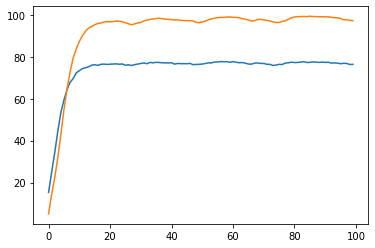

In [127]:
plt.plot(eo['acc'])
plt.plot(eo['train_acc'])

In [63]:
MP = os.path.join(os.pardir, 'metadata_50')


In [64]:
a = load_meta(MP)

In [65]:
a

,z_mu_0,z_mu_1,z_mu_2,z_mu_3,z_mu_4,z_mu_5,z_mu_6,z_mu_7,z_mu_8,z_mu_9,...,z_sig_122,z_sig_123,z_sig_124,z_sig_125,z_sig_126,z_sig_127,vp0,vp1,vp2,y
0,-0.168592,-0.169763,1.123454,-0.102161,-0.123310,-0.047843,-0.164133,-0.031004,0.544314,-0.154607,...,0.845943,0.918356,0.845117,1.013998,0.844486,0.843885,0,0,1,0
1,-0.134099,-0.169959,0.483605,-0.147921,0.099595,0.387963,0.275314,-0.147721,0.811916,0.018589,...,0.847346,0.886576,0.845728,0.855688,0.844057,0.847223,0,0,1,10
2,-0.112607,-0.156923,0.352698,-0.086046,-0.167899,1.340568,0.360664,-0.152542,1.142988,-0.168620,...,0.888304,0.851786,0.851824,0.906000,0.850179,0.844186,0,0,1,130
3,-0.093404,-0.169841,0.496092,-0.163298,-0.163540,1.136659,-0.140916,-0.151269,1.058258,-0.156523,...,0.865980,0.844812,0.849311,0.844281,0.873991,0.850026,0,0,1,72
4,0.079154,1.011713,-0.154259,1.253120,0.797030,-0.134991,0.149675,0.755909,-0.157246,1.036069,...,4.220757,4.427835,4.969017,3.742840,3.285074,3.491657,0,0,1,413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5897,-0.074372,-0.149521,0.292414,-0.024752,-0.152286,-0.167468,-0.169643,-0.167983,0.733661,-0.162364,...,0.936005,1.122033,0.858926,1.424070,0.844585,0.848149,0,0,1,75
5898,-0.164903,0.038168,-0.168730,-0.138961,-0.167916,0.152879,0.197204,-0.163089,0.515000,-0.157118,...,1.118588,0.871303,0.878870,1.070225,0.936464,0.917033,0,0,1,108
5899,-0.017157,-0.168093,0.344460,-0.118861,-0.137622,0.513425,-0.122537,-0.155546,0.901674,-0.039641,...,0.844272,0.843689,0.844158,0.985738,0.856115,0.846153,0,0,1,354
5900,0.354408,-0.157212,-0.135073,-0.167457,0.510792,0.190302,-0.049607,-0.169857,0.860662,-0.086137,...,0.870772,0.855060,0.844191,0.917085,0.855870,0.871705,1,0,0,83


In [66]:

model = CustomTrain(259, 788, [1024, 1024, 512, 256], nn.GELU(), batch_norm=False)
model.to(device)

CustomTrain(
  (activation): GELU()
  (last_layer): Linear(in_features=256, out_features=788, bias=True)
  (net): ModuleList(
    (0): Linear(in_features=259, out_features=1024, bias=True)
    (1): Linear(in_features=1024, out_features=1024, bias=True)
    (2): Linear(in_features=1024, out_features=512, bias=True)
    (3): Linear(in_features=512, out_features=256, bias=True)
  )
)

In [67]:
eo = train(a, model, ep=200, save=True, prefix='met_50')

C:\Users\LENOVO\.conda\envs\paltas\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\LENOVO\AppData\Local\Temp/ipykernel_5468/3585931085.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  vec_train = np.array([train_ids for train_ids,_ in skf.split(data, data.iloc[:,-1])])
C:\Users\LENOVO\.conda\envs\paltas\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\LENOVO\AppData\Local\Temp/ipykernel_5468/3585931085.py:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple o